In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.fftpack import fftshift, ifftshift
from scipy.fftpack import rfft, fftfreq

from scipy.integrate import simps
import math

## Função gaussiana

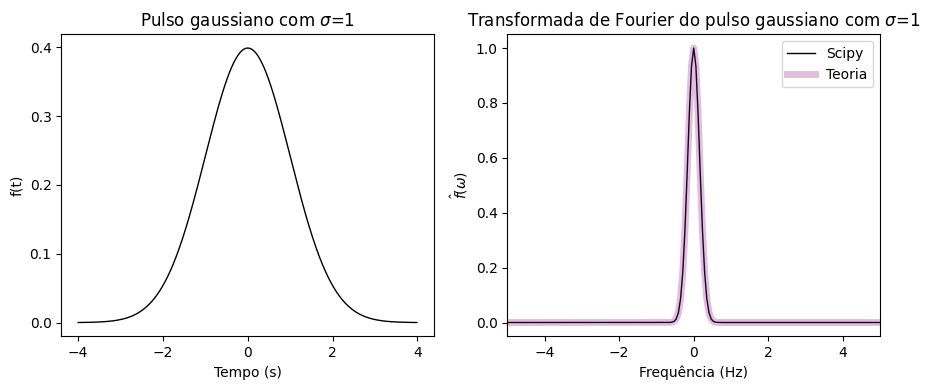

In [2]:
fs = 120 # frequência de amostragem
sigma = 1 # sigma da gaussiana 
tmax = 4.0 * sigma
t = np.arange(-tmax, tmax, 1.0 / fs) # domínio temporal
variance=sigma**2 

x1=1/(np.sqrt(2*np.pi*variance))*(np.exp(-t**2/(2*variance))) # sinal de entrada gaussiano

NFFT = 2048
f = (fs/NFFT)*np.arange(-NFFT/2, NFFT/2) 

X1 = fftshift(fft(x1, NFFT)) / fs # fft do sinal gaussiano

Xtheory = np.exp(-0.5*(2*np.pi*sigma*f)**2) # valor teórico da transformada de Fourier da gaussiana

fig = plt.figure(figsize = (9, 4))

plt.subplot(121)
plt.plot(t, x1, color = "black", linewidth = 1, linestyle = "-")
plt.title('Pulso gaussiano com $\sigma$={}'.format(sigma))
plt.xlabel('Tempo (s)')
plt.ylabel('f(t)')
plt.yticks(np.arange(0, 0.5, 0.10))


plt.subplot(122)
plt.plot(f, abs(X1), color = "black", linewidth = 1, linestyle = "-", label = "Scipy")
plt.plot(f, Xtheory, color = "purple",linewidth = 5, alpha = 0.25, label = "Teoria")
plt.title('Transformada de Fourier do pulso gaussiano com $\sigma$={}'.format(sigma))
plt.xlabel('Frequência (Hz)')
plt.ylabel('$\hat{f} (\omega)$')
plt.xlim(-5,5)
plt.legend()
plt.tight_layout()

plt.show()

## Função exponencial $f(t) = e^{-t}$


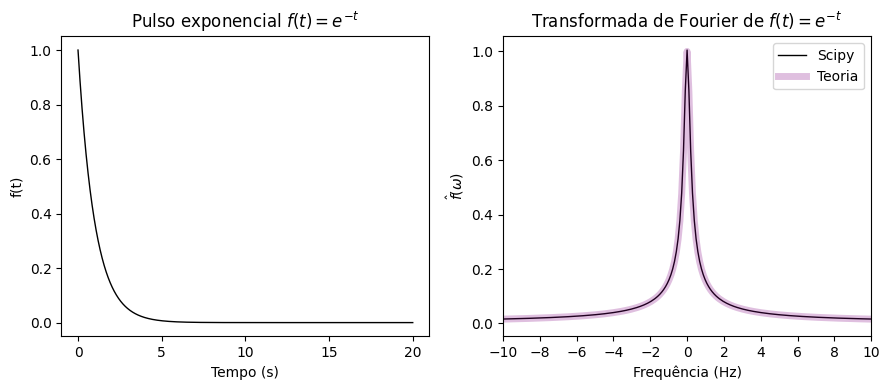

In [3]:
fs= 100 
tmax = 20.0
NFFT = 1024 

t_after = np.arange(0, tmax, 1.0 / fs)
y_after = []

for i in t_after:
    y_after = np.exp(-t_after)

f = (fs/NFFT) * np.arange(-NFFT/2, NFFT/2) 
X = fftshift(fft(y_after,NFFT)) / fs 

z = []

for f_i in f:
    k_i = 2.0 * np.pi * f_i
    z.append(abs(complex(1 / (1 + k_i**2), k_i / (1 + k_i**2))))

fig = plt.figure(figsize = (9, 4))

plt.subplot(121)
plt.plot(t_after, y_after, color = "black", linewidth = 1, linestyle = "-")
plt.title('Pulso exponencial $f(t) = e^{-t}$')
plt.xlabel('Tempo (s)')
plt.ylabel('f(t)')


plt.subplot(122)
plt.plot(f, abs(X), color = "black", linewidth = 1, linestyle = "-", label = "Scipy")
plt.plot(f, z, color = "purple",linewidth = 5, alpha = 0.25, label = "Teoria")
plt.title('Transformada de Fourier de $f(t) = e^{-t}$')
plt.xlabel('Frequência (Hz)')
plt.ylabel('$\hat{f}(\omega)$')
plt.xlim(-10,10)
plt.xticks(np.arange(-10, 11, 2))
plt.legend()
plt.tight_layout()

plt.show()

## Função exponencial $f(t)=e^{-t^2}$

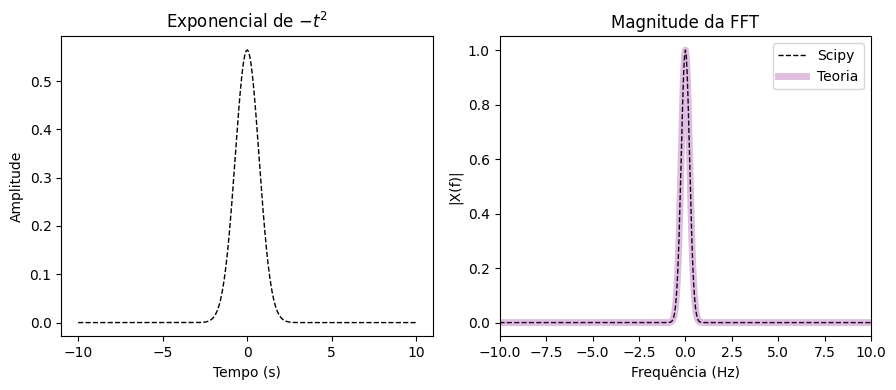

In [4]:
fs = 100 
tmax = 10.0
NFFT = 2048 
t = np.arange(-tmax, tmax, 1/fs) 
x= 1/(np.sqrt(np.pi))*np.exp(-t**2)

f = (fs/NFFT)*np.arange(-NFFT/2, NFFT/2) 
X = fftshift(fft(x, NFFT)) / fs 

z = np.exp(- 0.25 * (2.0 * np.pi * f) ** 2)

fig = plt.figure(figsize = (9, 4))

plt.subplot(121)
plt.plot(t, x, color = "black", linewidth = 1, linestyle = "--");
plt.title('Exponencial de $-t^2$')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.plot(f, abs(X), color = "black", linewidth = 1, linestyle = "--", label = "Scipy")
plt.plot(f, z, color = "purple",linewidth = 5, alpha = 0.25, label = "Teoria")
plt.title('Magnitude da FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('|X(f)|')
plt.xlim(-10,10)
plt.legend()
plt.tight_layout()

plt.show()

##  Função $f(t)=cos(t)$

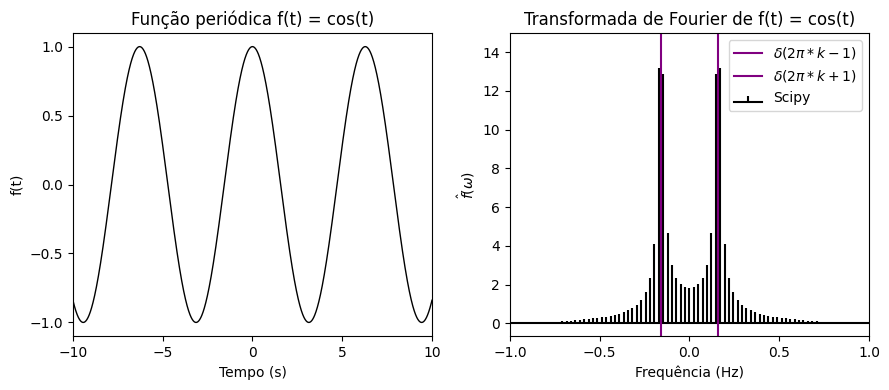

In [5]:
fs= 100 
tmax = 20.0
NFFT = 4096 

t = np.arange(-tmax, tmax, 1/fs) 
y = np.cos(t)

f = (fs/NFFT)*np.arange(-NFFT/2, NFFT/2) 
Y = fftshift(fft(y,NFFT)) / fs 

fig = plt.figure(figsize = (9, 4))

plt.subplot(121)
plt.plot(t, y, color = "black", linewidth = 1, linestyle = "-")
plt.title('Função periódica f(t) = cos(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('f(t)')
plt.xlim(-10,10)
plt.xticks(np.arange(-10, 11, 5))
plt.yticks(np.arange(-1, 1.2, 0.5))

plt.subplot(122)
plt.stem(f, abs(Y), "black", markerfmt = "", basefmt="-k", label =             "Scipy")
plt.axvline(x = 1.0 / (2.0 * np.pi), color = 'purple', label = r'$\delta(2\pi* k - 1)$')
plt.axvline(x = -1.0 / (2.0 * np.pi), color = 'purple', label = r'$\delta(2\pi* k + 1)$')
plt.title('Transformada de Fourier de f(t) = cos(t)');
plt.xlabel('Frequência (Hz)')
plt.ylabel('$\hat{f} (\omega)$')
plt.xlim(-1, 1)
plt.xticks(np.arange(-1, 1.5, 0.5))
plt.ylim(None, 15)
plt.legend()
plt.tight_layout()

plt.show()


## Função $f(t) = cos(2 \pi t)$

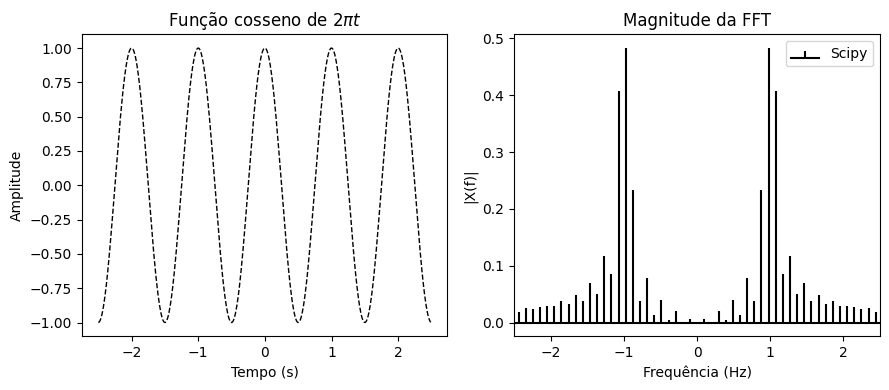

In [8]:
fs= 100 
t = np.arange(-2.5, 2.5, 1/fs) 
NFFT = 1024 
L = len(y)

y= np.cos(2*np.pi * t)

f = (fs/NFFT)*np.arange(-NFFT/2, NFFT/2) 
Y = fftshift(fft(y,NFFT)) 

fig = plt.figure(figsize = (9, 4))

plt.subplot(121)
plt.plot(t, y, color = "black", linewidth = 1, linestyle = "--");
plt.title('Função cosseno de $2 \pi t$')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.stem(f, abs(Y)/L, "black", markerfmt = "", basefmt="-k", label =             "Scipy")
plt.title('Magnitude da FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('|X(f)|')
plt.xlim(-2.5, 2.5)
plt.legend()
plt.tight_layout()

plt.show()


## Função sen(t)

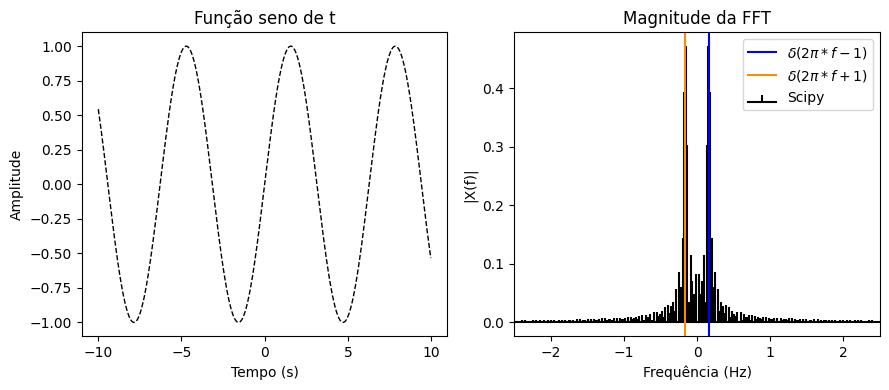

In [ ]:
fs= 90 
t = np.arange(-10, 10, 1/fs) 
NFFT = 4096 

y= np.sin(t)

f = (fs/NFFT)*np.arange(-NFFT/2, NFFT/2) 
Y = fftshift(fft(y,NFFT)) 

fig = plt.figure(figsize = (9, 4))

plt.subplot(121)
plt.plot(t, y, color = "black", linewidth = 1, linestyle = "--");
plt.title('Função seno de t')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.stem(f, abs(Y)/L, "black", markerfmt = "", basefmt="-k", label =             "Scipy")
plt.axvline(x = 1.0 / (2.0 * np.pi), color = 'b', label = r'$\delta(2\pi*f - 1)$')
plt.axvline(x = -1.0 / (2.0 * np.pi), color = 'darkorange', label = r'$\delta(2\pi*f + 1)$')
plt.title('Magnitude da FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('|X(f)|')
plt.xlim(-2.5, 2.5)
plt.legend()
plt.tight_layout()

plt.show()


## Função sen($2 \pi t$)

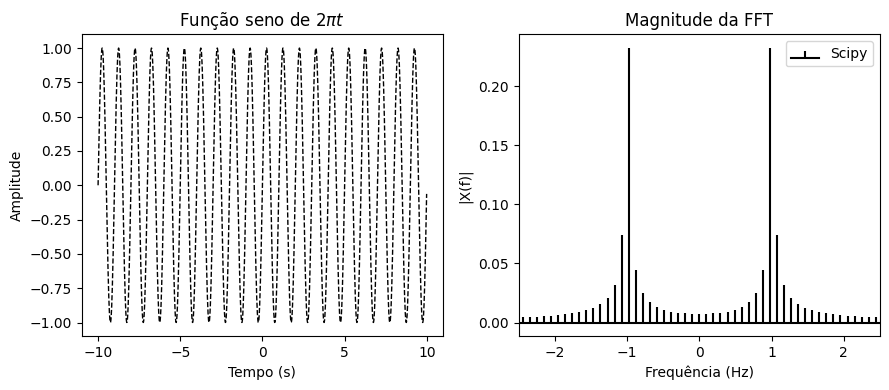

In [ ]:
fs= 100 
t = np.arange(-10, 10, 1/fs) 
NFFT = 1024 

y= np.sin(2*np.pi*t)

f = (fs/NFFT)*np.arange(-NFFT/2, NFFT/2) 
Y = fftshift(fft(y,NFFT)) 

fig = plt.figure(figsize = (9, 4))

plt.subplot(121)
plt.plot(t, y, color = "black", linewidth = 1, linestyle = "--");
plt.title('Função seno de $2 \pi t$')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.stem(f, abs(Y)/L, "black", markerfmt = "", basefmt="-k", label =             "Scipy")
plt.title('Magnitude da FFT');
plt.xlabel('Frequência (Hz)')
plt.ylabel('|X(f)|');
plt.xlim(-2.5,2.5)
plt.legend()
plt.tight_layout()

plt.show()
